In [47]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

### Business problem
In order to help companies and businesses understand their targeted customers, it is important that such businesses have a thorough understanding of how their consumers use their services. The problem we are trying to deal with is to define the effect of customer behaviour/lifestyles in the marketing domain.

### Questions to keep in mind:
- "Can the consumer support be organized into groups to generate customized connections within them?"
- "Is determining the most vital customer gatherings within the entire pool of consumers worthy?"

Source (https://www.analyticsvidhya.com/blog/2021/06/how-to-solve-customer-segmentation-problem-with-machine-learning/)

### Limitations:
- Database must have maximum three different variables 

In [53]:
# Collect & Cleanse the data

# Read csv file
df = pd.read_csv('Mall_Customers.csv')

# Drop unnecessary columns
data = df.drop(columns=['CustomerID', 'Gender'])

# Drop NA entries
data.dropna(inplace=True)

# Print data
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


*csv file from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

We will find the optimal number of clusters using the elbow method using the K-means clustering algorithm. This uses equal variances to divide our data. For more info on elbow method: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

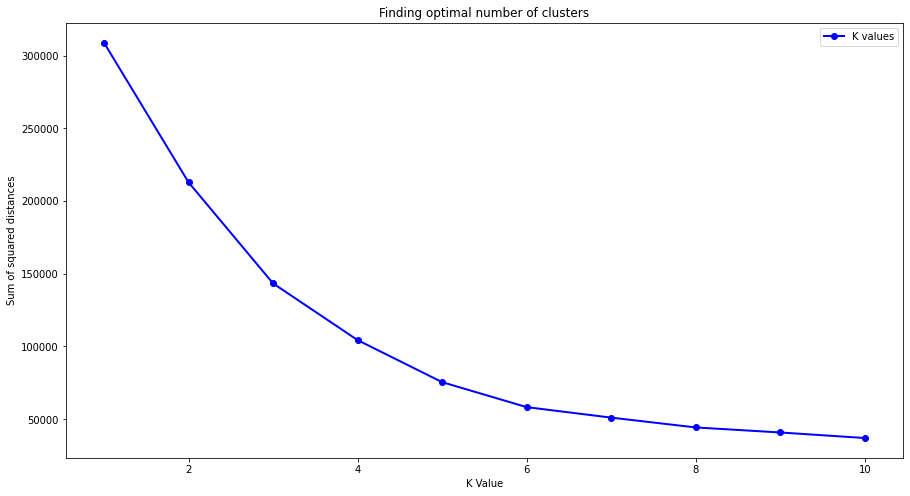

In [63]:
# Plot Kmeans model for values of K

# Convert dataframe to a numpy array
x=data.to_numpy()

# Create an empty dynamic array to store inertia values
wcss=[]

# For loop that iterates K values from 1 to 12 and appends inertia values
# calculates inertia for each value of k.
for k in range(1,11):
    # Selects initial cluster centers for clustering to speed up
    # convergence
    display = KMeans(n_clusters=k, init="k-means++")
    #Compute k-means clustering
    display.fit(x)
    # Append inertia values
    wcss.append(display.inertia_)

# Plot wcss
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss, linewidth=2, ls='-', color="b", marker="o", label = "K values")

# Define title
plt.title("Finding optimal number of clusters")

# Formatting
plt.xlabel("K Value")
plt.ylabel("Sum of squared distances")

# Create legend
plt.legend(loc='best')

# Display wcss graph
plt.show()

### K = 5
From the graph above, we can deduce that the optimal number of clusters is at five clusters. This is because beyond five clusters, the data will be modelled less efficiently. 

In [65]:
# Retrain model with 5 clusters 
new_data = KMeans(n_clusters=5)

# Compute cluster centers and predict cluster index for each customer
cluster_value = new_data.fit_predict(x)

# Append centroid values to dataframe
data['Centroid'] = cluster_value

data

,Age,Annual Income (k$),Spending Score (1-100),Centroid
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


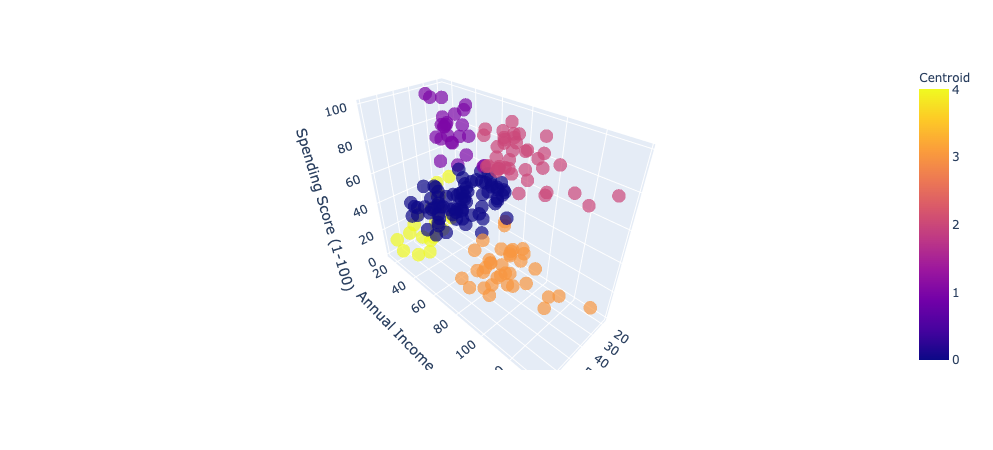

In [69]:
# Plot 3D model of consumer profiles and clusters
figure = px.scatter_3d(data,
                    x="Age", y="Annual Income (k$)", z="Spending Score (1-100)",
                    color='Centroid', 
                    opacity=0.7,
                    )

figure.show()

## Sources: 
https://aritic.com/blog/aritic-pinpoint/effective-customer-segmentation/
https://www.analyticsvidhya.com/blog/2021/06/how-to-solve-customer-segmentation-problem-with-machine-learning/